In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
keras = tf.keras
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
# Loading Datasets
vaccine_df = pd.read_csv('https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/us_data/time_series/time_series_covid19_vaccine_doses_admin_US.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [4]:
# Cleaning the Vaccine dataset. Aggregating the columns by country, dropping non relevant columns and transposing the dataset. Finally, renaming the labels.
vaccine_df = vaccine_df.groupby("Country_Region").sum().reset_index()
Vaccine_label =  vaccine_df['Country_Region'].values
vaccine_df = vaccine_df.drop(['Country_Region','Lat','Long_','UID','code3','FIPS','Population','Admin2'], axis=1)
vaccine_df = vaccine_df[vaccine_df.columns].T
vaccine_df.columns = Vaccine_label
vaccine_df.index = pd.to_datetime(vaccine_df.index)
vaccine_df.rename(columns={'US': 'Vaccinations'}, inplace=True)
vaccine_df.head()

<ipython-input-4-00e2de696ca0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vaccine_df = vaccine_df.groupby("Country_Region").sum().reset_index()


,Vaccinations
2020-12-14,0
2020-12-15,509
2020-12-16,12638
2020-12-17,51634
2020-12-18,127342


In [7]:
# Cleaning the Cases dataset. Aggregating the columns by country, dropping non relevant columns and transposing the dataset. Finally, renaming the labels.
confirmed_df = confirmed_df.groupby("Country_Region").sum().reset_index()
Country_confirmed =  confirmed_df['Country_Region'].values
confirmed_df = confirmed_df.drop(['Country_Region','Lat','Long_','UID','code3','FIPS'], axis=1)
confirmed_df = confirmed_df[confirmed_df.columns].T
confirmed_df.columns = Country_confirmed
confirmed_df.index = pd.to_datetime(confirmed_df.index)
confirmed_df.rename(columns={'US': 'Cases'}, inplace=True)
confirmed_df.head()

<ipython-input-7-b4e9d34455ff>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  confirmed_df = confirmed_df.groupby("Country_Region").sum().reset_index()


,Cases
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5


In [6]:
# Cleaning the Deaths dataset. Aggregating the columns by country, dropping non relevant columns and transposing the dataset. Finally, renaming the labels.
deaths_df = deaths_df.groupby("Country_Region").sum().reset_index()
Country_deaths =  deaths_df['Country_Region'].values
deaths_df = deaths_df.drop(['Country_Region','Lat','Long_','UID','code3','FIPS','Population'], axis=1)
deaths_df = deaths_df[deaths_df.columns].T
deaths_df.columns = Country_deaths
deaths_df.index = pd.to_datetime(deaths_df.index)
deaths_df.rename(columns={'US': 'Deaths'}, inplace=True)
deaths_df.head()

<ipython-input-6-baede941bb3e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  deaths_df = deaths_df.groupby("Country_Region").sum().reset_index()


,Deaths
2020-01-22,1
2020-01-23,1
2020-01-24,1
2020-01-25,1
2020-01-26,1


In [ ]:
# Checking the dates of the dataset
print(confirmed_df.index)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09'],
              dtype='datetime64[ns]', length=1143, freq=None)


In [ ]:
# Checking the dates of the dataset
print(vaccine_df.index)

DatetimeIndex(['2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
               '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21',
               '2020-12-22', '2020-12-23',
               ...
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09'],
              dtype='datetime64[ns]', length=816, freq=None)


In [ ]:
# Checking the dates of the dataset
print(deaths_df.index)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09'],
              dtype='datetime64[ns]', length=1143, freq=None)


In [8]:
# Checking the common dates of all the datasets to ensure continuity and alignment of different datasets
common_dates = confirmed_df.index.intersection(vaccine_df.index).intersection(deaths_df.index)
print(common_dates)


DatetimeIndex(['2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
               '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21',
               '2020-12-22', '2020-12-23',
               ...
               '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03',
               '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07',
               '2023-03-08', '2023-03-09'],
              dtype='datetime64[ns]', length=816, freq='D')


In [9]:
# Checking the common start dates among all the datasets
common_start_date = min(common_dates)
common_start_date

Timestamp('2020-12-14 00:00:00', freq='D')

In [ ]:
# Merge the DataFrames on the common dates
combined_df = pd.merge(confirmed_df, vaccine_df, left_index=True, right_index=True, how='inner')
combined_df = pd.merge(combined_df, deaths_df, left_index=True, right_index=True, how='inner')

# Display the combined DataFrame
print(combined_df)


                Cases  Vaccinations   Deaths
2020-12-14   16652287             0   304528
2020-12-15   16879508           509   307426
2020-12-16   17113651         12638   311092
2020-12-17   17352825         51634   314505
2020-12-18   17599265        127342   317433
...               ...           ...      ...
2023-03-05  103646975     696598923  1122134
2023-03-06  103655539     696598923  1122181
2023-03-07  103690910     696598923  1122516
2023-03-08  103755771     696598923  1123246
2023-03-09  103802702     696598923  1123836

[816 rows x 3 columns]


In [ ]:
# Saving the combined dataframe to drive for future use
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Downloading Dataset to Google Drive, Just in case
csv_path_colab = '/content/gdrive/My Drive/combined_data.csv'

# Save the DataFrame to a CSV file
combined_df.to_csv(csv_path_colab, index=False)

# Display a message indicating the save was successful
print(f"Combined DataFrame has been saved to {csv_path_colab}")


Combined DataFrame has been saved to /content/gdrive/My Drive/combined_data.csv


In [ ]:
# Align the DataFrames to the common start date
confirmed_df = confirmed_df.loc[common_start_date:]
vaccine_df = vaccine_df.loc[common_start_date:]
deaths_df = deaths_df.loc[common_start_date:]

fig = go.Figure()
fig.update_layout(
    template='plotly_dark',
    title={'text': 'Cumulative Cases, Deaths, and Doses',
           'y': 0.9, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
    xaxis_title="Dates",
    yaxis_title="Number Of Doses/Cases/Deaths",
)

# Vaccine Doses trace
fig.add_trace(go.Scatter(
    x=vaccine_df.index,
    y=vaccine_df['Vaccinations'],
    mode='lines+markers',
    name='Vaccine Doses',
    line=dict(color='blue', width=2)
))

# Confirmed Cases trace
fig.add_trace(go.Scatter(
    x=confirmed_df.index,
    y=confirmed_df['Cases'],
    mode='lines+markers',
    name='Confirmed Cases',
    line=dict(color='orange', width=2)
))

# Deaths trace
fig.add_trace(go.Scatter(
    x=deaths_df.index,
    y=deaths_df['Deaths'],
    mode='lines+markers',
    name='Deaths',
    line=dict(color='red', width=2)
))

# Show the plot
fig.show()


In [ ]:
# Check the order of columns in DataFrame
column_order = combined_df.columns

# Print the order of columns
print(column_order)


Index(['Cases', 'Vaccinations', 'Deaths'], dtype='object')


Epoch 1/25
26/26 [==============================] - 3s 17ms/step - loss: 0.8811 - val_loss: 1.0402
Epoch 2/25
26/26 [==============================] - 0s 7ms/step - loss: 0.4790 - val_loss: 0.8318
Epoch 3/25
26/26 [==============================] - 0s 7ms/step - loss: 0.0713 - val_loss: 0.5051
Epoch 4/25
26/26 [==============================] - 0s 7ms/step - loss: 0.0044 - val_loss: 0.3298
Epoch 5/25
26/26 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.1496
Epoch 6/25
26/26 [==============================] - 0s 8ms/step - loss: 9.8911e-04 - val_loss: 0.0475
Epoch 7/25
26/26 [==============================] - 0s 8ms/step - loss: 7.1815e-04 - val_loss: 0.0211
Epoch 8/25
26/26 [==============================] - 0s 8ms/step - loss: 6.0606e-04 - val_loss: 0.0280
Epoch 9/25
26/26 [==============================] - 0s 7ms/step - loss: 5.4977e-04 - val_loss: 0.0353
Epoch 10/25
26/26 [==============================] - 0s 7ms/step - loss: 4.7272e-04 - val_loss: 0.045

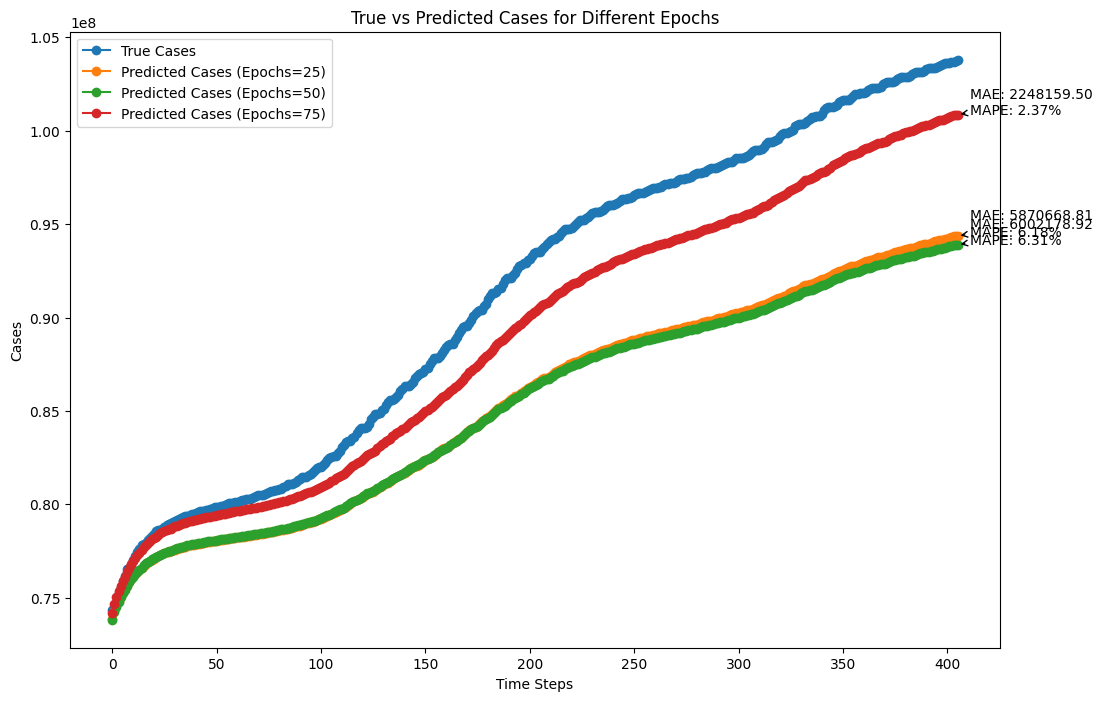

In [ ]:
# ------------------------------------------------------------------------------------MODEL WITH ONLY CASES-----------------------------------------------------------------------------------------
# Extract the 'Cases' column
cases_column = combined_df['Cases']

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cases_column.values.reshape(-1, 1))

# Create sequences for time series prediction
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Choose the number of time steps for sequence prediction
time_steps = 5  #

# Create sequences for training
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets
split_index = int(len(X) * 0.5)  # Split the data in half
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Different numbers of epochs to iterate over
epochs_list = [25, 50, 75]

# Store results
results = []

# True cases trace
true_cases_trace = None

# Iterate over different numbers of epochs
for num_epochs in epochs_list:
    # Define the LSTM model
    model = keras.models.Sequential([
        keras.layers.LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 1)),
        keras.layers.Dense(units=1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=16, validation_data=(X_test, y_test))

    # Make predictions on the test set
    y_pred_scaled = model.predict(X_test)

    # Inverse transform to get predictions in the original scale
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_true, y_pred)
    print(f'Mean Absolute Error on Test Set (Epochs={num_epochs}): {mae}')

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f'Mean Absolute Percentage Error on Test Set (Epochs={num_epochs}): {mape:.2f}%')

    # Store the results
    results.append({'epochs': num_epochs, 'mae': mae, 'mape': mape, 'y_true': y_true, 'y_pred': y_pred})

    # Store true cases trace for the last iteration
    true_cases_trace = y_true

# Plotting results
plt.figure(figsize=(12, 8))

# Plot true cases trace
plt.plot(true_cases_trace, label='True Cases', marker='o')

# Plot predicted cases for each set of epochs
for result in results:
    plt.plot(result['y_pred'], label=f'Predicted Cases (Epochs={result["epochs"]})', marker='o')

    # Annotate with MAE and MAPE
    plt.annotate(f'MAE: {result["mae"]:.2f}\nMAPE: {result["mape"]:.2f}%',
                 xy=(len(result['y_pred']) - 1, result['y_pred'][-1]),
                 xytext=(len(result['y_pred']) + 5, result['y_pred'][-1] + 50),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set labels and title
plt.xlabel('Time Steps')
plt.ylabel('Cases')
plt.title('True vs Predicted Cases for Different Epochs')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.4 MB/s eta 0:00:00


Reloading Tuner from my_dir/covid19_cases_prediction/tuner0.json
Best Hyperparameters:
Units: 50
Activation: relu
Learning Rate: 0.006641024661942141
Epoch 1/50
13/13 [==============================] - 1s 18ms/step - loss: 0.4543 - val_loss: 0.0018
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0351 - val_loss: 0.3021
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0074 - val_loss: 0.4173
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.2863
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0015 - val_loss: 0.0719
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 5.4250e-04 - val_loss: 0.0322
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 2.6127e-04 - val_loss: 0.0453
Epoch 8/50
13/13 [==============================] - 0s 5ms/step - loss: 2.2346e-04 - val_loss: 0.0346
Epoch 9/50
13/13 [==============================] - 0

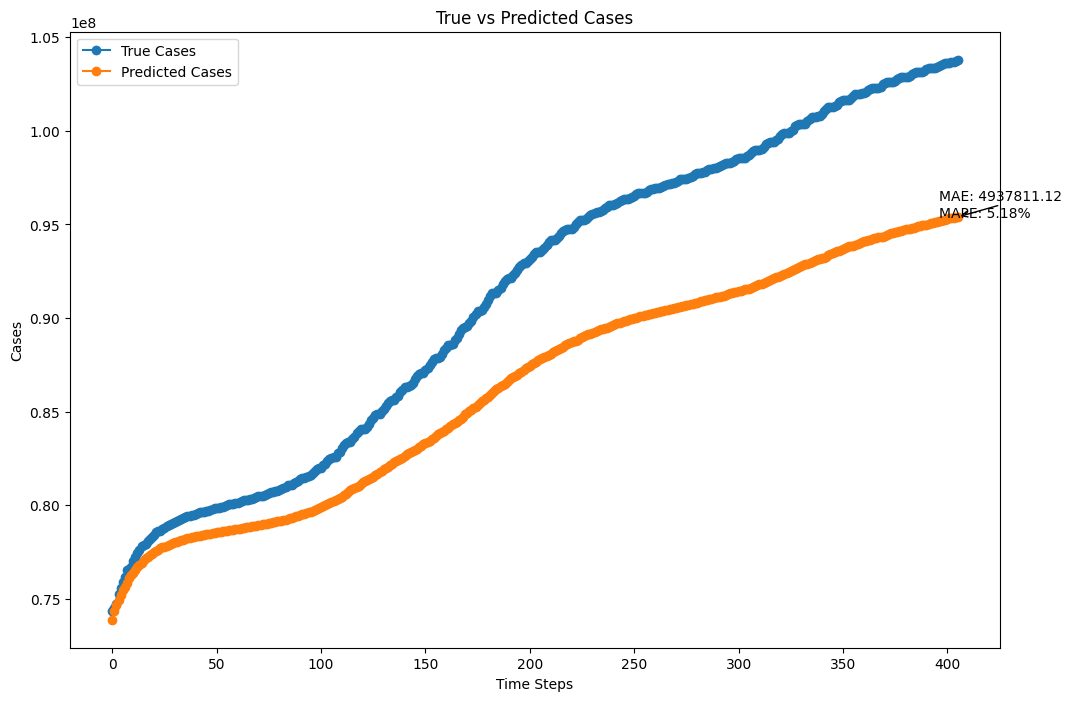

In [ ]:
# ---------------------------------------------------------------------------------HYPERTUNING ONLY CASES MODEL----------------------------------------------------------------------

import keras_tuner as kt
from tensorflow import keras

# Extract the 'Cases' column
cases_column = combined_df['Cases']

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cases_column.values.reshape(-1, 1))

# Create sequences for time series prediction
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Choose the number of time steps for sequence prediction
time_steps = 5  # can adjust this value

# Create sequences for training
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets
split_index = int(len(X) * 0.5)  # Split the data in half
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Hyperparameter tuning model builder function
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.LSTM(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid']),
        input_shape=(X_train.shape[1], 1)
    ))
    model.add(keras.layers.Dense(units=1))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='mean_squared_error'
    )
    return model

# Hyperparameter tuner setup
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    directory='my_dir',
    project_name='covid19_cases_prediction'
)

# Early stopping to prevent overfitting
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Start the search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[stop_early])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Display the best hyperparameters
print("Best Hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"Activation: {best_hps.get('activation')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
final_epochs = 50
history = model.fit(X_train, y_train, epochs=final_epochs, validation_data=(X_test, y_test))

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get predictions in the original scale
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE and MAPE
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Plotting results
plt.figure(figsize=(12, 8))
plt.plot(y_true, label='True Cases', marker='o')
plt.plot(y_pred, label='Predicted Cases', marker='o')
plt.xlabel('Time Steps')
plt.ylabel('Cases')
plt.title('True vs Predicted Cases')

# Annotate with MAE and MAPE
plt.annotate(f'MAE: {mae:.2f}\nMAPE: {mape:.2f}%', xy=(len(y_pred) - 1, y_pred[-1]),
             xytext=(len(y_pred) - 10, y_pred[-1]),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend()
plt.show()

Epoch 1/25
26/26 [==============================] - 4s 51ms/step - loss: 0.5278 - val_loss: 1.0254
Epoch 2/25
26/26 [==============================] - 0s 16ms/step - loss: 0.0653 - val_loss: 0.8706
Epoch 3/25
26/26 [==============================] - 0s 15ms/step - loss: 0.0118 - val_loss: 0.6236
Epoch 4/25
26/26 [==============================] - 0s 15ms/step - loss: 0.0017 - val_loss: 0.2708
Epoch 5/25
26/26 [==============================] - 0s 17ms/step - loss: 6.4554e-04 - val_loss: 0.0993
Epoch 6/25
26/26 [==============================] - 0s 15ms/step - loss: 3.2938e-04 - val_loss: 0.0116
Epoch 7/25
26/26 [==============================] - 0s 15ms/step - loss: 1.8792e-04 - val_loss: 0.0187
Epoch 8/25
26/26 [==============================] - 0s 16ms/step - loss: 1.3981e-04 - val_loss: 0.0435
Epoch 9/25
26/26 [==============================] - 0s 16ms/step - loss: 1.0608e-04 - val_loss: 0.0417
Epoch 10/25
26/26 [==============================] - 0s 13ms/step - loss: 8.6857e-05 - va

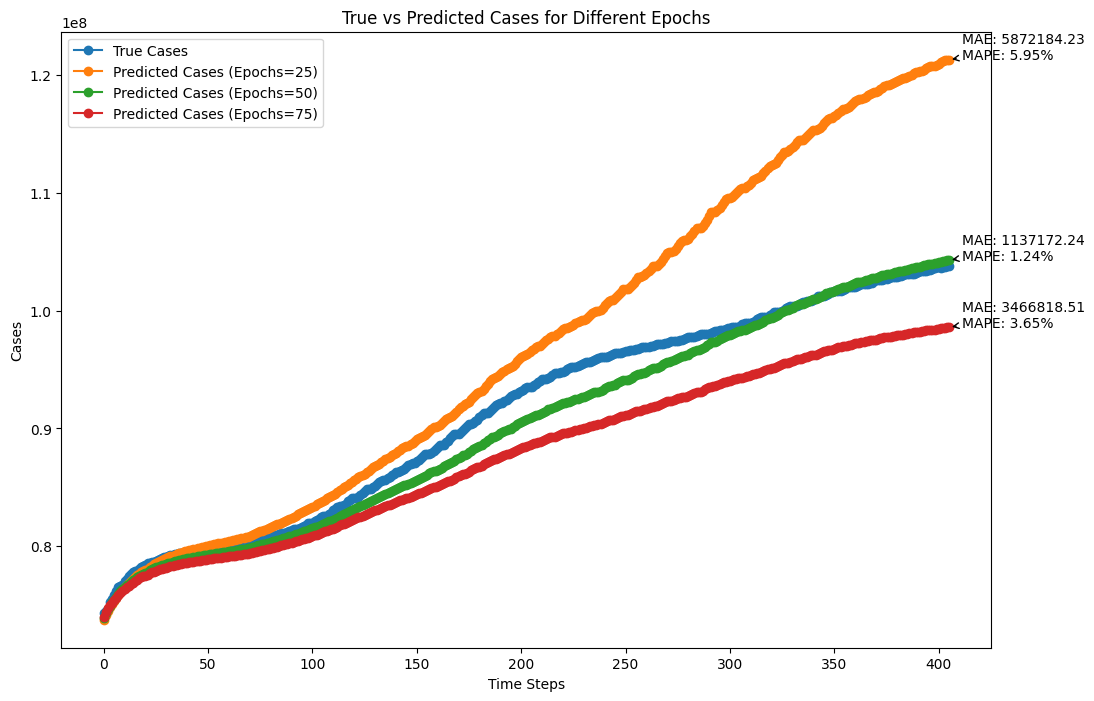

In [ ]:
# ---------------------------------------------------------------------------------MODEL WITH CASES AND VACCINATIONS---------------------------------------------------------------------------
# Extract the 'Cases' and 'Vaccinations' columns
cases_column = combined_df['Cases']
vaccinations_column = combined_df['Vaccinations']

# Normalize the data
scaler_cases = StandardScaler()
scaled_cases = scaler_cases.fit_transform(cases_column.values.reshape(-1, 1))

scaler_vaccinations = StandardScaler()
scaled_vaccinations = scaler_vaccinations.fit_transform(vaccinations_column.values.reshape(-1, 1))

# Combine the scaled cases and vaccinations data
scaled_data = np.hstack((scaled_cases, scaled_vaccinations))

# Create sequences for time series prediction
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps, 0])  # We only want to predict cases
    return np.array(X), np.array(y)

# Choose the number of time steps for sequence prediction
time_steps = 5  #can adjust this value

# Create sequences for training
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets
split_index = int(len(X) * 0.5)  # Split the data in half
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))  # We now have 2 features
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))  # We now have 2 features

# Different numbers of epochs to iterate over
epochs_list = [25, 50, 75]

# Store results
results = []

# True cases trace
true_cases_trace = None

# Iterate over different numbers of epochs
for num_epochs in epochs_list:
    # Define the LSTM model
    model = keras.models.Sequential([
        keras.layers.LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 2)),  # We now have 2 features
        keras.layers.Dense(units=1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=16, validation_data=(X_test, y_test))

    # Make predictions on the test set
    y_pred_scaled = model.predict(X_test)

    # Inverse transform to get predictions in the original scale
    y_pred = scaler_cases.inverse_transform(y_pred_scaled)
    y_true = scaler_cases.inverse_transform(y_test.reshape(-1, 1))

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_true, y_pred)
    print(f'Mean Absolute Error on Test Set (Epochs={num_epochs}): {mae}')

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f'Mean Absolute Percentage Error on Test Set (Epochs={num_epochs}): {mape:.2f}%')

    # Store the results
    results.append({'epochs': num_epochs, 'mae': mae, 'mape': mape, 'y_true': y_true, 'y_pred': y_pred})

    # Store true cases trace for the last iteration
    true_cases_trace = y_true

# Plotting results
plt.figure(figsize=(12, 8))

# Plot true cases trace
plt.plot(true_cases_trace, label='True Cases', marker='o')

# Plot predicted cases for each set of epochs
for result in results:
    plt.plot(result['y_pred'], label=f'Predicted Cases (Epochs={result["epochs"]})', marker='o')

    # Annotate with MAE and MAPE
    plt.annotate(f'MAE: {result["mae"]:.2f}\nMAPE: {result["mape"]:.2f}%',
                 xy=(len(result['y_pred']) - 1, result['y_pred'][-1]),
                 xytext=(len(result['y_pred']) + 5, result['y_pred'][-1] + 50),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set labels and title
plt.xlabel('Time Steps')
plt.ylabel('Cases')
plt.title('True vs Predicted Cases for Different Epochs')

# Show legend
plt.legend()

# Show the plot
plt.show()


Reloading Tuner from my_dir/covid19_cases_vaccinations_prediction/tuner0.json
Best Hyperparameters:
Units: 80
Activation: tanh
Learning Rate: 0.00727897287917818
Epoch 1/50
13/13 [==============================] - 2s 33ms/step - loss: 0.1892 - val_loss: 0.1794
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0125 - val_loss: 0.0808
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.0162
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0035 - val_loss: 0.0071
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 6/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0022 - val_loss: 0.0035
Epoch 7/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0098
Epoch 8/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 0.0129
Epoch 9/50
13/13 [==============================] - 0

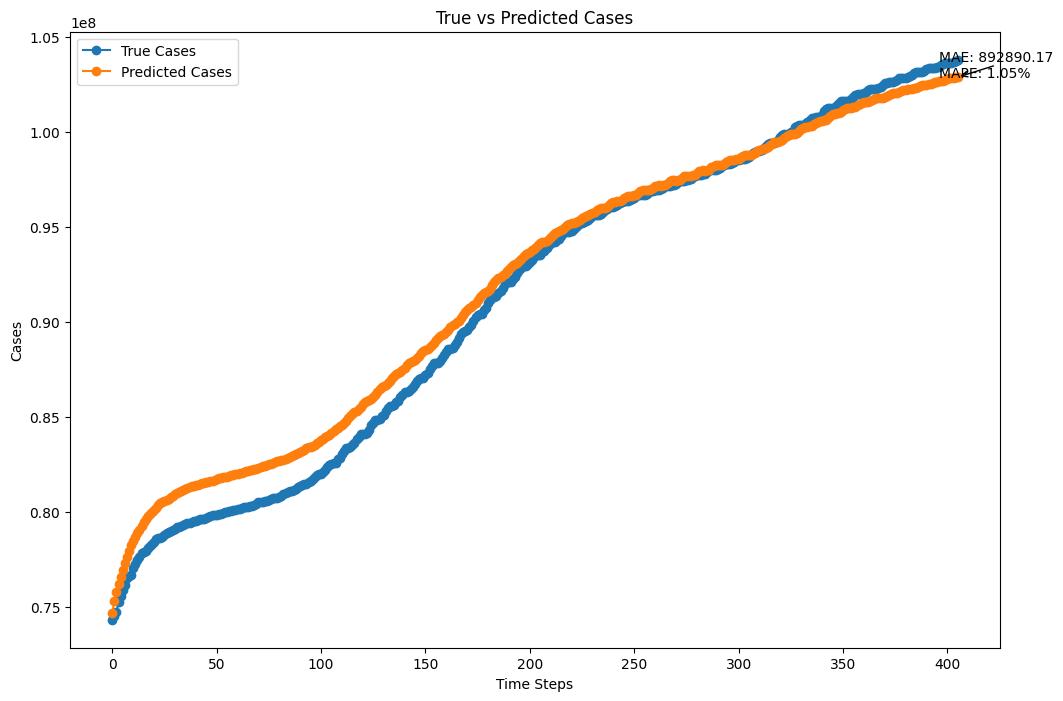

In [ ]:
# ---------------------------------------------------------------------------------------------HYPERTUNING MODEL WITH CASES AND VACCINATIONS--------------------------------------------------------------
import keras_tuner as kt
from tensorflow import keras

# Extract the 'Cases' and 'Vaccinations' columns
cases_column = combined_df['Cases']
vaccinations_column = combined_df['Vaccinations']

# Normalize the data
scaler_cases = StandardScaler()
scaled_cases = scaler_cases.fit_transform(cases_column.values.reshape(-1, 1))

scaler_vaccinations = StandardScaler()
scaled_vaccinations = scaler_vaccinations.fit_transform(vaccinations_column.values.reshape(-1, 1))

# Combine the scaled cases and vaccinations data
scaled_data = np.hstack((scaled_cases, scaled_vaccinations))

# Create sequences for time series prediction
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps, 0])  # We only want to predict cases
    return np.array(X), np.array(y)

# Choose the number of time steps for sequence prediction
time_steps = 5

# Create sequences for training
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets
split_index = int(len(X) * 0.5)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))  # 2 features: cases and vaccinations
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))

# Hyperparameter tuning model builder function
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.LSTM(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid']),
        input_shape=(X_train.shape[1], 2)
    ))
    model.add(keras.layers.Dense(units=1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='mean_squared_error'
    )
    return model

# Hyperparameter tuner setup
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    directory='my_dir',
    project_name='covid19_cases_vaccinations_prediction'
)

# Early stopping to prevent overfitting
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Start the search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[stop_early])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Display the best hyperparameters
print("Best Hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"Activation: {best_hps.get('activation')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
final_epochs = 50
history = model.fit(X_train, y_train, epochs=final_epochs, validation_data=(X_test, y_test))

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get predictions in the original scale
y_pred = scaler_cases.inverse_transform(y_pred_scaled)
y_true = scaler_cases.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE and MAPE
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Plotting results
plt.figure(figsize=(12, 8))
plt.plot(y_true, label='True Cases', marker='o')
plt.plot(y_pred, label='Predicted Cases', marker='o')
plt.xlabel('Time Steps')
plt.ylabel('Cases')
plt.title('True vs Predicted Cases')

# Annotate with MAE and MAPE
plt.annotate(f'MAE: {mae:.2f}\nMAPE: {mape:.2f}%', xy=(len(y_pred) - 1, y_pred[-1]),
             xytext=(len(y_pred) - 10, y_pred[-1]),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend()
plt.show()


Epoch 1/25
26/26 [==============================] - 2s 17ms/step - loss: 0.6057 - val_loss: 0.6567
Epoch 2/25
26/26 [==============================] - 0s 7ms/step - loss: 0.0587 - val_loss: 0.2962
Epoch 3/25
26/26 [==============================] - 0s 7ms/step - loss: 0.0151 - val_loss: 0.0179
Epoch 4/25
26/26 [==============================] - 0s 7ms/step - loss: 0.0039 - val_loss: 0.1293
Epoch 5/25
26/26 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.1124
Epoch 6/25
26/26 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0589
Epoch 7/25
26/26 [==============================] - 0s 7ms/step - loss: 0.0014 - val_loss: 0.0665
Epoch 8/25
26/26 [==============================] - 0s 7ms/step - loss: 0.0010 - val_loss: 0.0769
Epoch 9/25
26/26 [==============================] - 0s 7ms/step - loss: 9.0677e-04 - val_loss: 0.0862
Epoch 10/25
26/26 [==============================] - 0s 7ms/step - loss: 5.9033e-04 - val_loss: 0.0877
Epoch 11/2

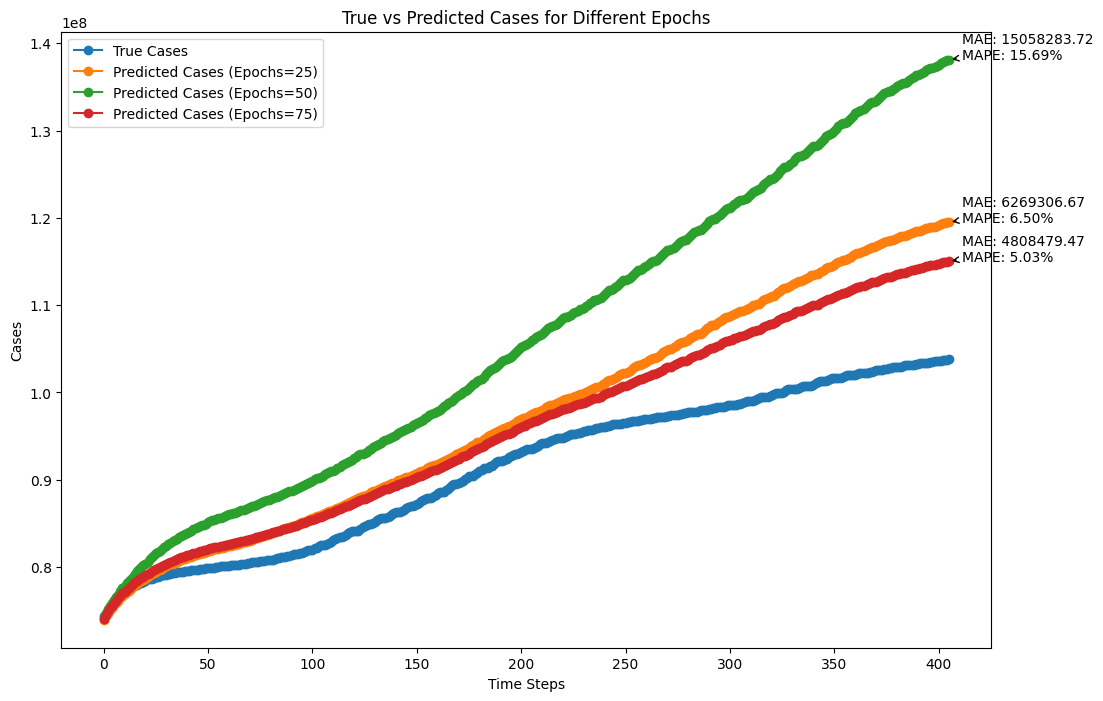

In [ ]:
# ------------------------------------------------------------------------------------------------------MODEL WITH CASES,VACCINATIONS AND DEATHS-----------------------------------------------------------------------------
# Extract the 'Cases', 'Vaccinations', and 'Deaths' columns
cases_column = combined_df['Cases']
vaccinations_column = combined_df['Vaccinations']
deaths_column = combined_df['Deaths']

# Normalize the data
scaler_cases = StandardScaler()
scaled_cases = scaler_cases.fit_transform(cases_column.values.reshape(-1, 1))

scaler_vaccinations = StandardScaler()
scaled_vaccinations = scaler_vaccinations.fit_transform(vaccinations_column.values.reshape(-1, 1))

scaler_deaths = StandardScaler()
scaled_deaths = scaler_deaths.fit_transform(deaths_column.values.reshape(-1, 1))

# Combine the scaled cases, vaccinations, and deaths data
scaled_data = np.hstack((scaled_cases, scaled_vaccinations, scaled_deaths))

# Create sequences for time series prediction
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps, 0])  # We only want to predict cases
    return np.array(X), np.array(y)

# Choose the number of time steps for sequence prediction
time_steps = 5  #

# Create sequences for training
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets
split_index = int(len(X) * 0.5)  # Split the data in half
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 3))  # We now have 3 features
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 3))  # We now have 3 features

# Different numbers of epochs to iterate over
epochs_list = [25, 50, 75]

# Store results
results = []

# True cases trace
true_cases_trace = None

# Iterate over different numbers of epochs
for num_epochs in epochs_list:
    # Define the LSTM model
    model = keras.models.Sequential([
        keras.layers.LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], 3)),  # We now have 3 features
        keras.layers.Dense(units=1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=16, validation_data=(X_test, y_test))

    # Make predictions on the test set
    y_pred_scaled = model.predict(X_test)

    # Inverse transform to get predictions in the original scale
    y_pred = scaler_cases.inverse_transform(y_pred_scaled)
    y_true = scaler_cases.inverse_transform(y_test.reshape(-1, 1))

    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_true, y_pred)
    print(f'Mean Absolute Error on Test Set (Epochs={num_epochs}): {mae}')

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f'Mean Absolute Percentage Error on Test Set (Epochs={num_epochs}): {mape:.2f}%')

    # Store the results
    results.append({'epochs': num_epochs, 'mae': mae, 'mape': mape, 'y_true': y_true, 'y_pred': y_pred})

    # Store true cases trace for the last iteration
    true_cases_trace = y_true

# Plotting results
plt.figure(figsize=(12, 8))

# Plot true cases trace
plt.plot(true_cases_trace, label='True Cases', marker='o')

# Plot predicted cases for each set of epochs
for result in results:
    plt.plot(result['y_pred'], label=f'Predicted Cases (Epochs={result["epochs"]})', marker='o')

    # Annotate with MAE and MAPE
    plt.annotate(f'MAE: {result["mae"]:.2f}\nMAPE: {result["mape"]:.2f}%',
                 xy=(len(result['y_pred']) - 1, result['y_pred'][-1]),
                 xytext=(len(result['y_pred']) + 5, result['y_pred'][-1] + 50),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set labels and title
plt.xlabel('Time Steps')
plt.ylabel('Cases')
plt.title('True vs Predicted Cases for Different Epochs')

# Show legend
plt.legend()

# Show the plot
plt.show()


Trial 30 Complete [00h 00m 03s]
val_loss: 0.8919408917427063

Best val_loss So Far: 0.0012797698145732284
Total elapsed time: 00h 01m 25s
Best Hyperparameters:
Units: 70
Activation: relu
Learning Rate: 0.006073973849810032
Epoch 1/50
13/13 [==============================] - 1s 19ms/step - loss: 0.1551 - val_loss: 0.0313
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0080 - val_loss: 0.0392
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0031 - val_loss: 0.0384
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.1932
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 7.3456e-04 - val_loss: 0.1566
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 5.3845e-04 - val_loss: 0.1566
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 3.5068e-04 - val_loss: 0.1929
Epoch 8/50
13/13 [==============================] - 0s 6ms/step - loss: 2.6302

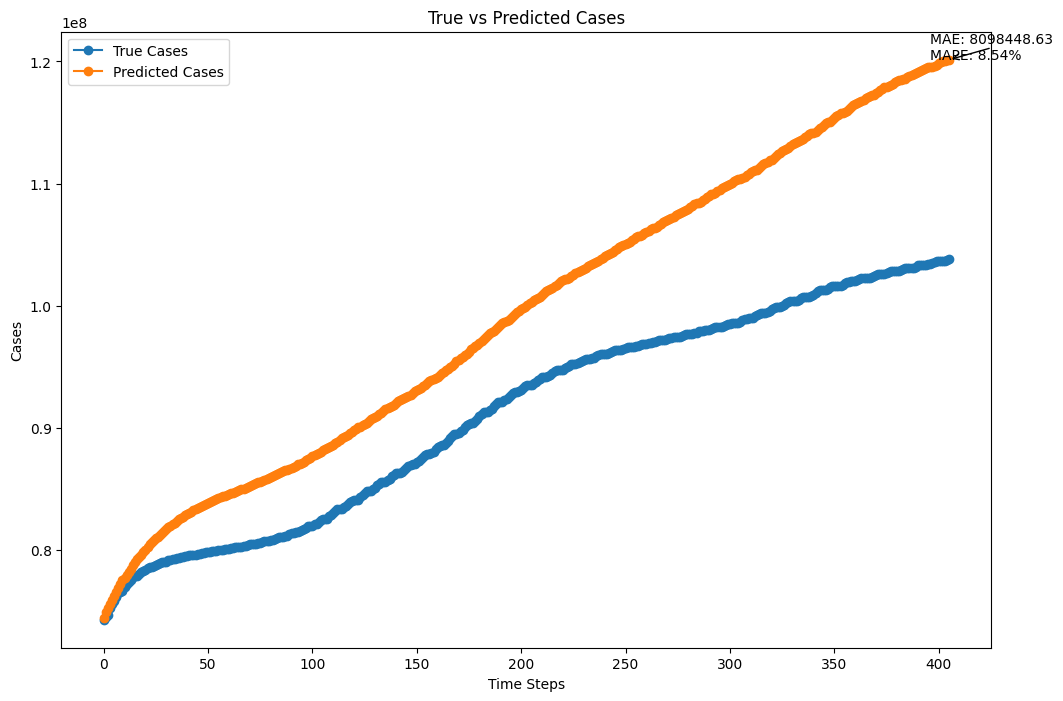

In [ ]:
# ---------------------------------------------------------------------------------HYPERTUNING CASES, VACCINATIONS AND DEATHS-----------------------------------------------------------------
import keras_tuner as kt
from tensorflow import keras


# Extract the 'Cases', 'Vaccinations', and 'Deaths' columns
cases_column = combined_df['Cases']
vaccinations_column = combined_df['Vaccinations']
deaths_column = combined_df['Deaths']

# Normalize the data
scaler_cases = StandardScaler()
scaled_cases = scaler_cases.fit_transform(cases_column.values.reshape(-1, 1))

scaler_vaccinations = StandardScaler()
scaled_vaccinations = scaler_vaccinations.fit_transform(vaccinations_column.values.reshape(-1, 1))

scaler_deaths = StandardScaler()
scaled_deaths = scaler_deaths.fit_transform(deaths_column.values.reshape(-1, 1))

# Combine the scaled cases, vaccinations, and deaths data
scaled_data = np.hstack((scaled_cases, scaled_vaccinations, scaled_deaths))

# Create sequences for time series prediction
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps, 0])  # We only want to predict cases
    return np.array(X), np.array(y)

# Choose the number of time steps for sequence prediction
time_steps = 5

# Create sequences for training
X, y = create_sequences(scaled_data, time_steps)

# Split the data into training and testing sets
split_index = int(len(X) * 0.5)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 3))  # We now have 3 features
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 3))

# Hyperparameter tuning model builder function
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.LSTM(
        units=hp.Int('units', min_value=10, max_value=100, step=10),
        activation=hp.Choice('activation', values=['relu', 'tanh', 'sigmoid']),
        input_shape=(X_train.shape[1], 3)
    ))
    model.add(keras.layers.Dense(units=1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='mean_squared_error'
    )
    return model

# Hyperparameter tuner setup
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    directory='my_dir',
    project_name='covid19_cases_vaccinations_deaths_prediction'
)

# Early stopping to prevent overfitting
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Start the search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[stop_early])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Display the best hyperparameters
print("Best Hyperparameters:")
print(f"Units: {best_hps.get('units')}")
print(f"Activation: {best_hps.get('activation')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)
final_epochs = 50
history = model.fit(X_train, y_train, epochs=final_epochs, validation_data=(X_test, y_test))

# Make predictions
y_pred_scaled = model.predict(X_test)

# Inverse transform to get predictions in the original scale
y_pred = scaler_cases.inverse_transform(y_pred_scaled)
y_true = scaler_cases.inverse_transform(y_test.reshape(-1, 1))

# Calculate MAE and MAPE
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Plotting results
plt.figure(figsize=(12, 8))
plt.plot(y_true, label='True Cases', marker='o')
plt.plot(y_pred, label='Predicted Cases', marker='o')
plt.xlabel('Time Steps')
plt.ylabel('Cases')
plt.title('True vs Predicted Cases')

# Annotate with MAE and MAPE
plt.annotate(f'MAE: {mae:.2f}\nMAPE: {mape:.2f}%', xy=(len(y_pred) - 1, y_pred[-1]),
             xytext=(len(y_pred) - 10, y_pred[-1]),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.legend()
plt.show()
